# Materialien zu <i>agla</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Beispiele zu Raumkurven 
<br><br>

In [1]:
%run agla/start

<br>
### Raumparabel

In [2]:
rp = Kurve(v(t, t^2, t^3), (t, -2.3, 2.3))
rp.prg

Vektorschar([x, z, y]) = Vektorschar([t])

In [3]:
zeichne([rp, rot, 'radius=0.08'])

In [4]:
p1 = rp.proj(Ebene(0, 0, 1, 10))
p2 = rp.proj(Ebene(1, 0, 0, 10))
p3 = rp.proj(Ebene(0, 1, 0, 10))

zeichne([rp, 2], [p1, rot, 2], [p2, grün, 2], [p3, blau, 2])

In [5]:
k = Kugel(rp.pkt(t), 0.4)

In [6]:
zeichne(rp, [k, rot, (t, -2.3, 2.3)])    # Bewegung der Kugel entlang der Raumparabel

In [7]:
rp.krümm(), rp.wind()

⎛        _________________________________________________________            
⎜       ╱                        4      2                                     
⎜      ╱                      9⋅t  + 9⋅t  + 1                              3  
⎜2⋅   ╱   ─────────────────────────────────────────────────────── , ──────────
⎜    ╱         12        10        8        6       4       2          4      
⎝  ╲╱     729⋅t   + 972⋅t   + 675⋅t  + 280⋅t  + 75⋅t  + 12⋅t  + 1   9⋅t  + 9⋅t

     ⎞
     ⎟
     ⎟
─────⎟
2    ⎟
  + 1⎠

In [8]:
rp.krümm(0), rp.wind(0)

(2, 3)

In [9]:
kk = rp.kr_kreis(t)   # der allgewmeine Krümmungskreis

In [10]:
zeichne(rp, [kk, grün, 2, (-0.95, 1.2)])     # Animation

agla: lange Rechenzeiten


<br>
### Ellipse im Raum

In [11]:
ellipse = e = Kurve(v(cos(t)+sin(t), 2*cos(t)-sin(t), 
                    2*cos(t)+1/2*sin(t)), (t, 0, 2*pi))

In [12]:
sicht_box(-3, 3)
zeichne([e, grün, 2])

In [13]:
e1 = e.bild(drehx(30))      # Drehung um 30°
zeichne([e, grün], [e1, rot, 2])

In [14]:
e.is_eben, e1.is_eben

(True, True)

In [15]:
sicht_box(-10, 10)
A = e.pkt(0); B = e.pkt(pi/2); C = e.pkt(pi)
ee = Ebene(A, v(A,  B), v(A, C))

zeichne([e.bild(streckung(O, 3)), grün, 2], [ee, gelb])

<br>
### Helix, Schraubenkurve

In [16]:
helix = lambda a, b, ber: Kurve(v(a*cos(t), a*sin(t), b*t), (t, ber[0], ber[1]))

In [17]:
h1 = helix(4, 0.5, (-4*pi, 4*pi) )

In [18]:
zeichne(h1, box=nein)

In [19]:
h2 = h1.bild(spiegelung(xz_ebene))

In [20]:
zeichne(h1, h2, box=nein)

<br>
### Schneckenkurve (Konische Spirale)

In [21]:
archimedische_spirale = asp = lambda a, b, c, ber:  \
   Kurve(v(a*t*cos(b*t), a*t*sin(b*t), c*t), (t, ber[0], ber[1]))

In [22]:
sp1 = asp(1, 1, Rational(2, 3), (0, 15*pi))
sp1.prg

Vektorschar([x, z, y]) = Vektorschar([t])

In [23]:
sp11 = sp1.proj(xy_ebene)
zeichne([sp11, 'fein=300'], box=nein)

In [24]:
sicht_box(-50, 50)
zeichne([sp1, 'fein=300'], box=nein)   # Verfeinerung

In [25]:
logarithmische_spirale = lsp = lambda a, b, c, d, ber:  \
   Kurve(v(a*cos(b*t)*exp(c*t), a*sin(b*t)*exp(c*t), d*t), (t, ber[0], ber[1]))

In [26]:
sp2 = lsp(1, 6, 1, 5, (0, 3/2*pi))
sp2.prg

Vektorschar([x, z, y]) = Vektorschar([t])

In [27]:
sicht_box(-100, 100)
zeichne([sp2, 'fein=300'], box=nein)

In [28]:
sp21 = sp2.proj(xy_ebene)
zeichne([sp21, 'fein=300'])

<br>
### Vivianikurve

In [29]:
S = Sphäre(O, a)

In [30]:
viviani_kurve = vk = S.kurve(t, t, (t, 0, 2*pi))

In [31]:
vk1 = vk.sch_el(1)

In [32]:
sicht_box(-2, 2)
zeichne([S.sch_el(1), gelb], vk1)

In [33]:
# Eine andere Parametrisierung

vk2 = Kurve( 1/2 * v(1+cos(t), sin(t), 2*sin(t/2)), (t, -2*pi, 2*pi))

In [34]:
zeichne([vk1, 3, rot], [vk2, gelb, 2])

Die Kurve entsteht bei der Durchdringung eines Zylinders mit dem Radius $a$ und einer <br>
Kugel mit dem Radius $2a$. Der Zylinder ist dabei um den Wert $a$ entlang der $x$-Achse <br>verschoben

$(x-a)^2+y^2=a^2\qquad$ Zylinder<br>
$x^2+y^2+z^2=4a^2\qquad$ Kugel

In [35]:
K, k = S.sch_el(8), vk.sch_el(8)
Z = Fläche(v(4*cos(u)+4, 4*sin(u), w), (u, 0, 2*pi), (w, -10, 10))

In [36]:
zeichne([K, 'lightgrey'], [Z, 'lightgrey'], [k, rot, 2])

<br>
### Loxodrome

In [37]:
loxodrome = lambda a, b: Kurve(v(a*cos(t)/cosh(b*t), a*sin(t)/cosh(b*t), 
                                                   a*tanh(b*t)), (t, -50, 50))

In [38]:
lo = loxodrome(8, 0.2)    

zeichne([S.sch_el(8-1/100), 'lightgrey'], [lo, rot, 'fein=800'])

# Verringerung des Kugelradius zur besseren Darstellung

<br>
### Tennisballkurve

https://mathematikalpha.de/wp-content/uploads/2017/01/18-Kurven.pdf

In [39]:
a = 4
b = 2

r = a + b
K = Kugel(O, r)

xk = a*cos(t) + b*cos(3*t)
yk = a*sin(t) - b*sin(3*t)
zk = 2*sqrt(a*b) * sin(2*t)   # in der Quelle fehlerhaft

tennisball_kurve = tb = lambda a, b: Kurve(v(xk, yk, zk), (t, 0, 2*pi))


In [40]:
tb1 = tb(a, b)

zeichne([K, gelb], [tb1, 3, grün], achsen=nein, box=nein)

<br>
### Cielia

https://mathematikalpha.de/wp-content/uploads/2017/01/18-Kurven.pdf

In [41]:
R = 1
K = Kugel(O, R)

celia = lambda n, m: Kurve( R * v(cos(n*t) * cos(t), 
                                  cos(n*t) * sin(t), 
                                  sin(n*t)), 
                           (t, 0, m*pi))


In [42]:
ce1 = celia(Rational(5, 4), 9)

In [43]:
zeichne([K, 'lightgrey'], [ce1, rot, 2, 'fein=500'], achsen=nein, box=nein )

<br>
### Kurven auf dem Torus

In [44]:
F = lambda a, b: v( (b+a*cos(w))*cos(u), (b+a*cos(w))*sin(u), a*sin(w) )

torus = Fläche(F(1, 3), (u, 0, 2*pi), (w, 0, 2*pi))

In [45]:
tk = torus.kurve(t, 4*t, (t, 0, 2*pi))

In [46]:
zeichne([torus, 'lightgrey'], [tk, rot, 2], achsen=nein, box=nein)

In [47]:
zeichne([tk.proj(xy_ebene), rot, 2], achsen=nein, box=nein)

<br>
### Kleeblattschlinge (einfachster Knoten)

In [48]:
torus1 = Fläche(F(2, 8), (u, 0, 2*pi), (w, 0, 2*pi))

In [49]:
tk1 = torus1.kurve(2*t, 3*t, (t, 0, 2*pi))
tk1.prg

Vektorschar([x, z, y]) = Vektorschar([t])

In [50]:
sicht_box(-12, 12)
zeichne([tk1, rot, 2])

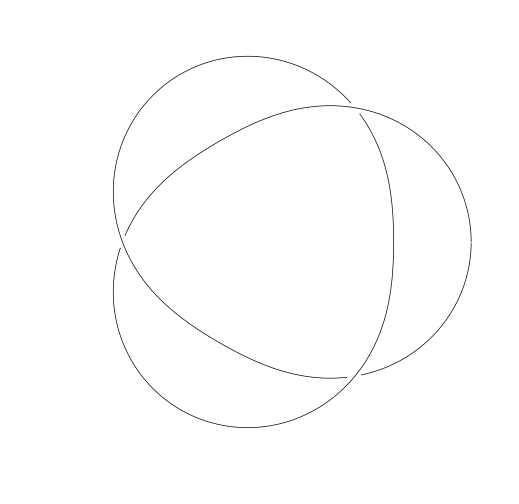

In [51]:
p = tk1.pkt()
p2 = v(p.x, p.y)   # Übergang zur Projektion in 2D

pr = Kurve(p2, (t, 0, 2*pi))

d = 0.02
zeichne(pr.stück(0, pi/2-d), pr.stück(pi/2+d, 7/6*pi-d), pr.stück(7/6*pi+d, 11/6*pi-d), 
       pr.stück(11/6*pi+d, 2*pi), achsen=nein)

### Anderer Torusknoten

https://mathematikalpha.de/wp-content/uploads/2017/01/18-Kurven.pdf

In [52]:
tk2 = torus1.kurve(4*t, 9*t, (t, 0, 2*pi))
tk2.prg

Vektorschar([x, z, y]) = Vektorschar([t])

In [53]:
zeichne([torus1, 'lightgrey'], [tk2, rot, 'radius=0.2'], achsen=nein, box=nein)